In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import my_data
import numpy as np
import matplotlib.pyplot as plt
import configparser
from os.path import join as oj
config = configparser.ConfigParser()
config.read("../config.ini")
save_path = config["PATHS"]["model_path"]

In [10]:
x, y, num_classes, class_dict = my_data.load_layer_data(
    oj(config["DATASET"]["data_path"], "lno")
)

In [11]:
x_ho, y_ho, num_classes_ho, class_dict_ho = my_data.load_layer_data(
    oj(config["DATASET"]["data_path"], "lno_halfHour")
)

In [2]:
import numpy as np
my_arr = [4,5,6,6,7]
my_arr = np.asarray(my_arr)
print(my_arr[3,2])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [4]:
np.random.choice(10, 3, replace=False)

array([0, 7, 2])

In [12]:
np.unique(y)

array([0, 1, 2], dtype=uint8)

In [13]:
np.unique(y_ho)

array([  0,   1,   2, 255], dtype=uint8)

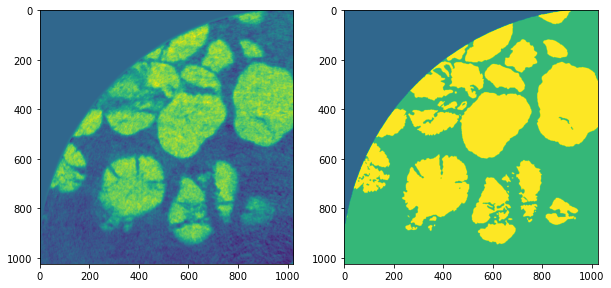

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(x[0, 0, :, :])
axes[1].imshow(y[ 0, :, :], vmin =-1, vmax = 2)
# ax

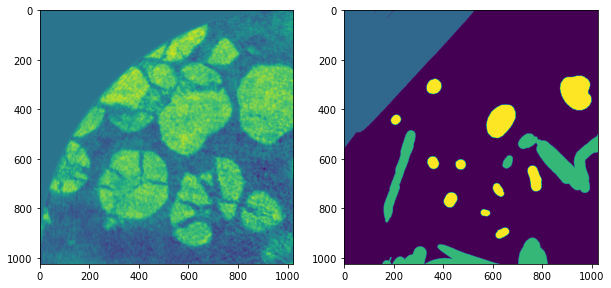

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
test_show = y_ho[2, :, :].astype(np.int32)
test_show[test_show == 255] = -1
axes[0].imshow(x_ho[2, 0, :, :])
axes[1].imshow(test_show, vmin =-1, vmax = 2)

(0.0, 0.03)

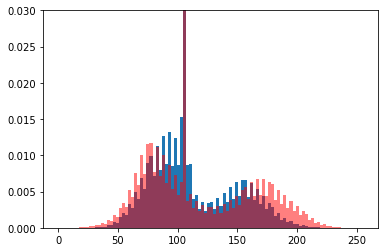

In [18]:
plt.hist(x_ho.flatten(), density=True, bins =100);
plt.hist(x.flatten(), alpha = 0.5, color = 'red', density=True,bins =100);
plt.ylim(0, 0.03)

In [35]:
x[0,0,0,0]

0.41568627450980394